In [1]:
pip install py-AutoClean

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.7 MB/s eta 0:00:00
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10272 sha256=f8d9100923941eff3cbf797ca2a93ad0826c8e1b0ebf0ceaef1b426b47587ec5
  Stored in directory: /root/.cache/pip/wheels/90/13/2b/023a24f8979c2b917dded511572b55f79d5b3a848a3e6646d1
Successfully built py-AutoClean


In [2]:
import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')

In [4]:
# Step 1: Initial exploration
print("Initial Dataset Overview:\n")
print("Null values in each column:\n", data.isnull().sum())
print("\nTotal Duplicates:", data.duplicated().sum())

data.head()


Initial Dataset Overview:

Null values in each column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

Total Duplicates: 0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# print no od rows
print("Number of rows in the dataset:", len(data))

Number of rows in the dataset: 9994


In [6]:
# print the outliers
data.describe()



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9945.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156972,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206668,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# identify column types
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [8]:
# def visualize_box_plot(df):
#   numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

#   # Creating box plots for each numerical column
#   for column in numerical_columns:
#       plt.figure(figsize=(8, 6))  # Set figure size
#       sns.boxplot(x=df[column])  # Create box plot
#       plt.xlabel(column)  # Set x-axis label
#       plt.title(f'Box Plot of {column}')  # Set plot title
#       plt.show()  # Show plot

In [9]:
# # Visualize before handling outliers
# visualize_box_plot(data)

In [10]:
# Step 2: Apply AutoClean
cleaned_data = AutoClean(
    data,
    mode="auto",  # Cleans missing, outliers, and encodes categorical data
    encode_categ='auto',  # Encode categorical features
    missing_num=True,  # Impute missing numerical data
    missing_categ='auto',  # Impute missing categorical data
    outliers='auto',  # Detect and handle outliers
    duplicates = True,
    extract_datetime = 's',


)

AutoClean process completed in 4.617472 seconds
Logfile saved to: /content/autoclean.log


In [11]:
# Step 3: Post-cleaning overview
print("\nCleaned Dataset Overview:\n")
# Access the cleaned data using the 'output' attribute
print("Null values in each column:\n", cleaned_data.output.isnull().sum())
print("\nTotal Duplicates:", cleaned_data.output.duplicated().sum())
cleaned_data.output.head()


Cleaned Dataset Overview:

Null values in each column:
 Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
Country                     0
City                        0
State                       0
Postal Code                 0
Region                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Day                         0
Month                       0
Year                        0
Country_United States       0
Category_Furniture          0
Category_Office Supplies    0
Category_Technology         0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home Office         0
Region_Centra

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Sub-Category_lab
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,False,True,False,False,False,True,False,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,False,True,False,False,False,True,False,5
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,False,False,False,False,True,False,False,True,False,10
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,False,False,False,True,16
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,False,False,False,True,14


In [12]:
# print the no of rows
print("Number of rows in the cleaned dataset:", len(cleaned_data.output))
# cleaned_data.output.head()

Number of rows in the cleaned dataset: 9994


In [13]:
# # visualize the box plot for cleaned_data
# visualize_box_plot(cleaned_data.output)

In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pycaret.anomaly import *
from AutoClean import AutoClean

In [15]:
# Convert cleaned data to DataFrame
df_cleaned = cleaned_data.output

In [16]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Sub-Category_lab
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,False,True,False,False,False,True,False,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,False,True,False,False,False,True,False,5
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,False,False,False,False,True,False,False,True,False,10
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,False,False,False,True,16
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,False,False,False,True,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,False,False,False,True,False,False,False,True,False,9
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,False,True,False,False,False,True,9
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,False,True,False,False,False,True,13
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,False,True,False,False,False,True,12


In [17]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from textwrap import wrap

# # Function for business-friendly EDA
# def business_friendly_eda(df):
#     # 1. Separate numerical and categorical columns
#     numerical_cols = df.select_dtypes(include=[np.number]).columns
#     categorical_cols = df.select_dtypes(include=['object']).columns

#     # 2. Distribution of Numerical Columns (Histograms)
#     print("\n=== Distribution of Numerical Columns ===")
#     num_rows = int(np.ceil(len(numerical_cols) / 2))  # Calculate rows for subplots
#     num_cols = min(len(numerical_cols), 2)  # Maximum 2 columns
#     plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows
#     for i, col in enumerate(numerical_cols, 1):
#         plt.subplot(num_rows, num_cols, i)
#         sns.histplot(df[col], kde=True, color='blue')
#         plt.title(f'Distribution of {col}')
#         plt.xlabel(col)
#         plt.ylabel('Frequency')
#         plt.annotate(f"Mean: {df[col].mean():.2f}\nMedian: {df[col].median():.2f}",
#                      xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", alpha=0.1))
#     plt.tight_layout()
#     plt.show()
#     print("Recommendation: Look for patterns in the data distribution. If the data is skewed, consider normalizing it for better analysis.")

#     # 3. Correlation Heatmap
#     if len(numerical_cols) > 1:
#         print("\n=== Correlation Between Numerical Features ===")
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
#         plt.title('Correlation Between Numerical Features')
#         plt.annotate("Values close to 1 or -1 indicate strong relationships.",
#                      xy=(0.5, -0.2), xycoords='axes fraction', fontsize=10, ha='center')
#         plt.show()
#         print("Recommendation: Focus on highly correlated features (close to 1 or -1) for deeper analysis. For example, if income and spending are highly correlated, target high-income customers for premium products.")

#     # 4. Pie Chart for Clusters (Customer Segmentation)
#     if len(numerical_cols) > 1:
#         print("\n=== Customer Segmentation ===")
#         scaler = StandardScaler()
#         scaled_data = scaler.fit_transform(df[numerical_cols])
#         kmeans = KMeans(n_clusters=3)
#         df['cluster'] = kmeans.fit_predict(scaled_data)
#         cluster_counts = df['cluster'].value_counts()
#         plt.figure(figsize=(8, 6))
#         plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
#         plt.title('Customer Segmentation (Clusters)')
#         plt.show()
#         print("Recommendation: Use clusters to group customers with similar behaviors. For example, Cluster 0 might represent budget-conscious customers, while Cluster 1 represents high-spending customers. Tailor marketing strategies for each group.")

#     # 5. Line Chart for Trends Over Time (if applicable)
#     if 'Date' in df.columns or 'Month' in df.columns:
#         print("\n=== Trends Over Time ===")
#         time_col = 'Date' if 'Date' in df.columns else 'Month'
#         plt.figure(figsize=(10, 6))
#         sns.lineplot(x=df[time_col], y=df[numerical_cols[0]], marker='o')
#         plt.title(f'Trend of {numerical_cols[0]} Over Time')
#         plt.xlabel(time_col)
#         plt.ylabel(numerical_cols[0])
#         plt.xticks(rotation=45)
#         plt.show()
#         print(f"Recommendation: Analyze trends over time to identify growth or decline. For example, if {numerical_cols[0]} is increasing, consider scaling up resources to meet demand.")





#     # 8. Business Insights
#     print("\n=== Business Insights ===")
#     if len(numerical_cols) >= 2:
#         correlation = df[numerical_cols[0]].corr(df[numerical_cols[1]])
#         print(f"\nCorrelation between {numerical_cols[0]} and {numerical_cols[1]}: {correlation:.2f}")
#         if correlation > 0.5:
#             print("- Strong positive correlation: As one increases, the other tends to increase.")
#         elif correlation < -0.5:
#             print("- Strong negative correlation: As one increases, the other tends to decrease.")
#         else:
#             print("- Weak or no correlation: The two variables are not strongly related.")
#         print("Recommendation: Use correlations to identify key drivers of business outcomes. For example, if income and spending are strongly correlated, focus on increasing customer income through loyalty programs.")

# # Perform Business-Friendly EDA
# business_friendly_eda(df_cleaned)

# **discriptive data analysis**

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def generate_dynamic_insights(df, column):
    """
    Generates automated business insights based on categorical distributions.
    """
    unique_values = df[column].nunique()
    total_values = len(df[column])
    top_category = df[column].value_counts().idxmax()
    top_category_percentage = df[column].value_counts(normalize=True).iloc[0]

    # Determine insights based on data patterns
    insights = []

    if unique_values > total_values * 0.5:
        insights.append(f"{column} appears to be a unique identifier. It is not useful for aggregation but can be used for tracking trends like customer retention and fraud detection.")

    if top_category_percentage > 0.5:
        insights.append(f"{column} is dominated by one category ({top_category}, {top_category_percentage:.1%}). Consider diversifying products or marketing efforts to create a balanced market.")

    if unique_values > 50 and top_category_percentage < 0.05:
        insights.append(f"{column} has a high number of unique categories with no clear dominance. Clustering techniques (e.g., K-Means) can help identify meaningful groups.")

    if unique_values > 5 and top_category_percentage < 0.3:
        insights.append(f"{column} has a well-distributed set of categories. Investigate potential correlations between {column} and key business metrics like revenue or sales.")

    if (df[column].value_counts(normalize=True) < 0.01).sum() > unique_values * 0.5:
        insights.append(f"{column} contains many low-frequency categories. Identify if these represent niche products, seasonal trends, or potential data errors.")

    if unique_values < total_values * 0.05:
        insights.append(f"{column} likely represents key business attributes such as product types or customer segments. Use this to optimize inventory and targeted marketing.")

    return "\n".join(insights) if insights else f"{column} contains meaningful business insights. Further analysis can help optimize business strategies."

def plot_top_categorical_counts_with_dynamic_insights(df):
    """
    Plots the top 20 categories based on count.
    Uses:
    - Pie charts for categorical columns with exactly 3 unique classes.
    - Bar charts for other categorical columns.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        category_counts = df[column].value_counts().nlargest(10)

        plt.figure(figsize=(10, 5))

        if len(df[column].unique()) == 3:  # Use pie chart if exactly 3 unique categories
            plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=LIGHT_COLORS)
            plt.title(f"Distribution of {column} (Count)")

        else:  # Use bar chart for all other cases
            sns.barplot(y=category_counts.index, x=category_counts.values, palette=DARK_COLORS + LIGHT_COLORS)
            plt.xlabel("Count")
            plt.ylabel(column)
            plt.title(f"Top 10 {column} Categories (by Count)")

        # Generate insights and recommendations
        insight_text = generate_dynamic_insights(df, column)
        plt.figtext(0.5, -0.25, insight_text, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()

def plot_top_numerical_insights(df):
    """
    Analyzes numerical data and visualizes only meaningful distributions.
    - Filters out ID-like columns.
    - Uses histograms, line plots, and bar charts dynamically.
    """
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Remove ID-like columns (those with mostly unique values)
    filtered_numerical_columns = [col for col in numerical_columns if df[col].nunique() / len(df) < 0.9]

    for column in filtered_numerical_columns:
        plt.figure(figsize=(10, 5))

        # # Use different types of charts based on the data
        # if df[column].nunique() > 50:  # Continuous data -> line chart
        #     sns.lineplot(data=df[column], color=DARK_COLORS[0])
        #     plt.title(f"Trend of {column} Over Time")
        #     plt.xlabel("Index")
        #     plt.ylabel(column)

        if df[column].nunique() > 5 and df[column].nunique() < 50:  # Moderate categories -> bar chart
            sns.barplot(x=df[column].value_counts().index[:10], y=df[column].value_counts().values[:10], palette=DARK_COLORS + LIGHT_COLORS)
            plt.title(f"Top 10 Values of {column}")
            plt.xlabel(column)
            plt.ylabel("Count")

        else:  # Discrete numeric values -> histogram
            sns.histplot(df[column], bins=10, kde=True, color=DARK_COLORS[1])
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")

        # Insights and recommendations
        plt.figtext(0.5, -0.25, f"Insight: {column} shows meaningful business trends.\nRecommendation: Use this to predict future sales, demand, or operational efficiency.",
                    wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()

# Example usage
# plot_top_categorical_counts_with_dynamic_insights(df_cleaned)
# plot_top_numerical_insights(df_cleaned)


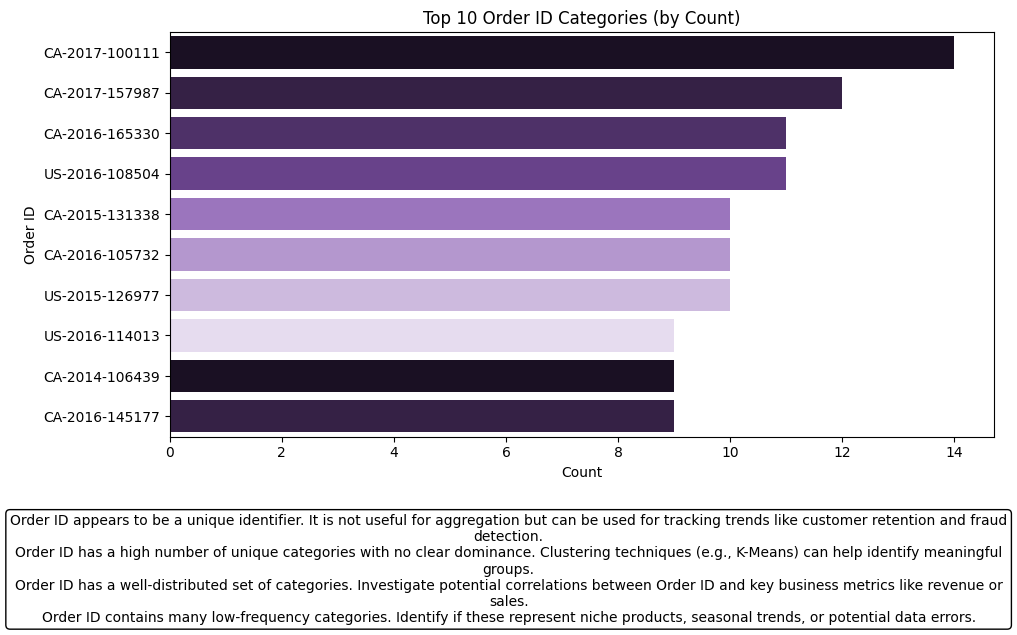

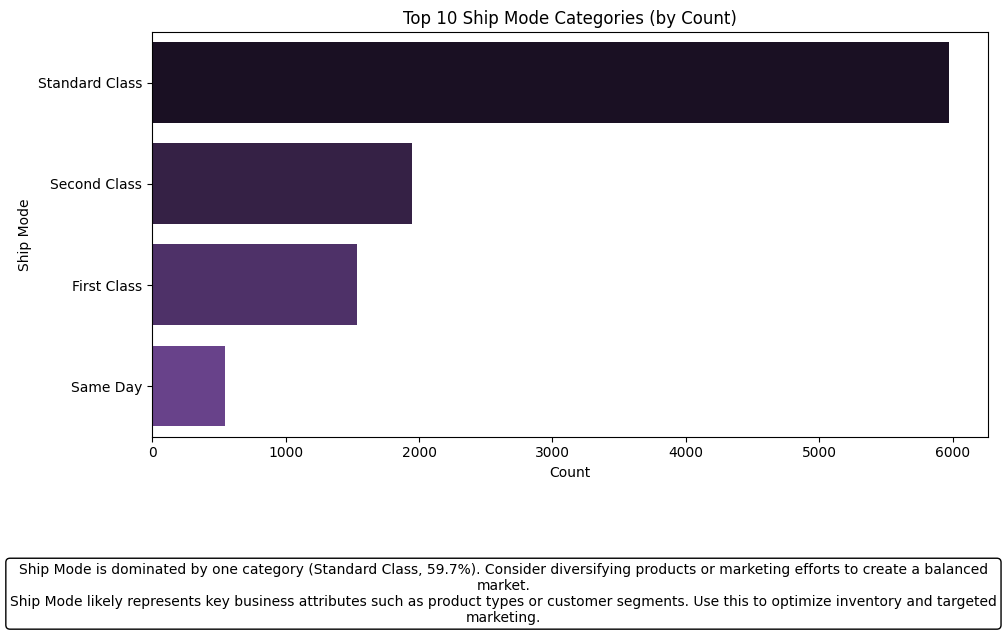

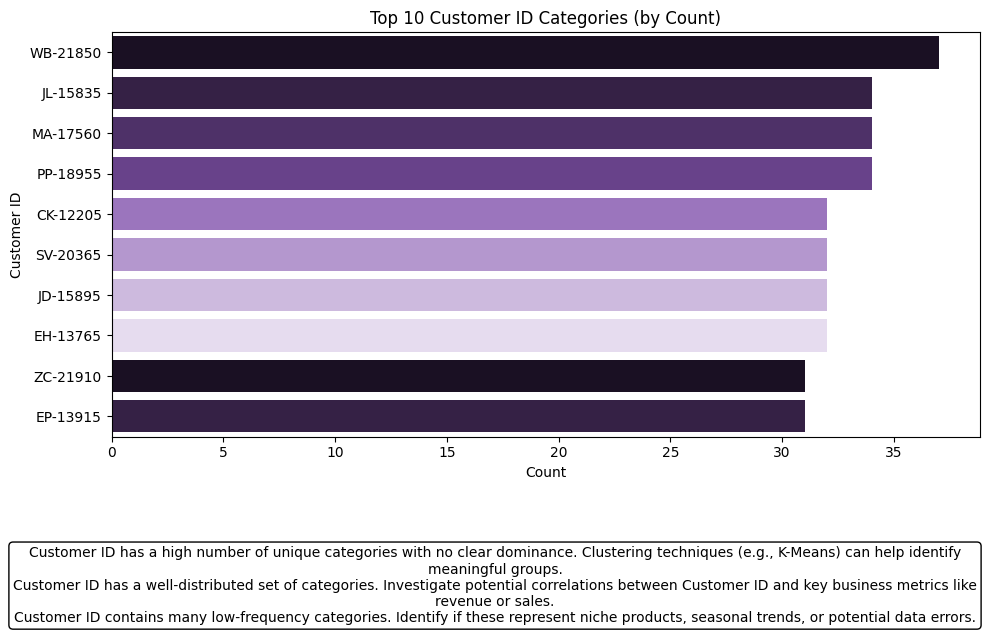

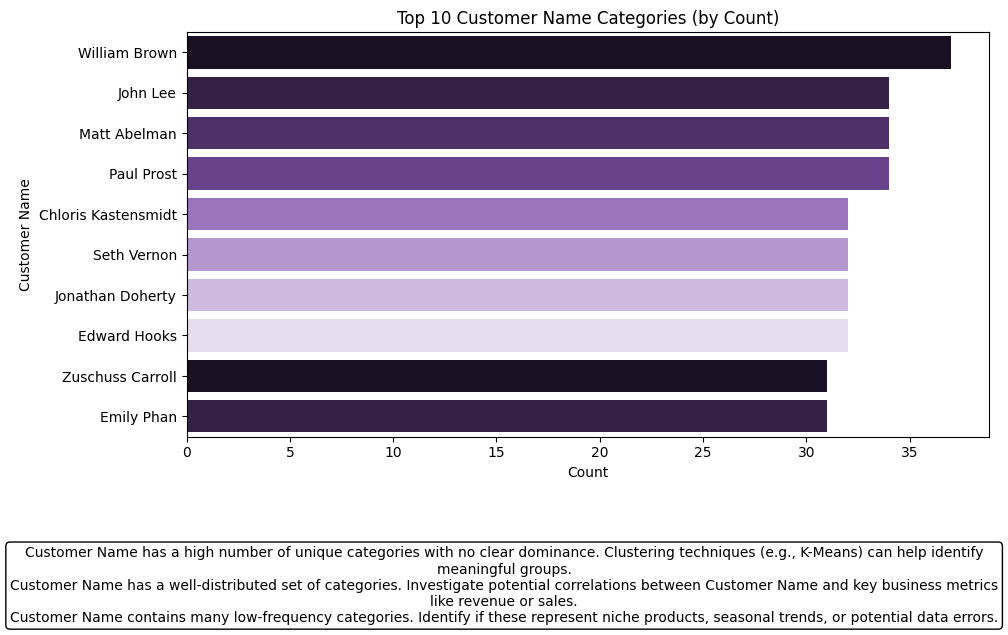

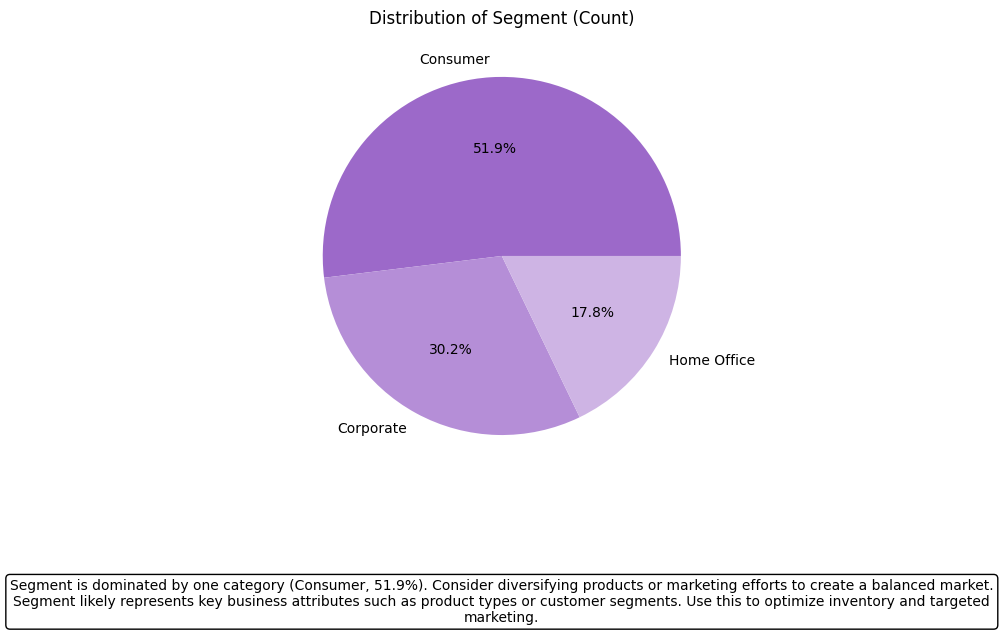

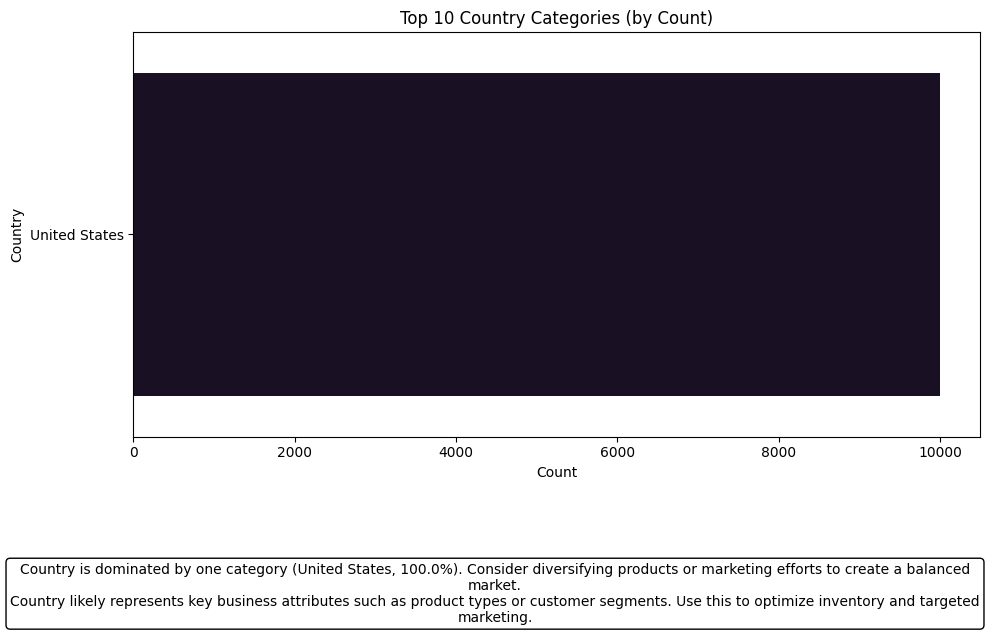

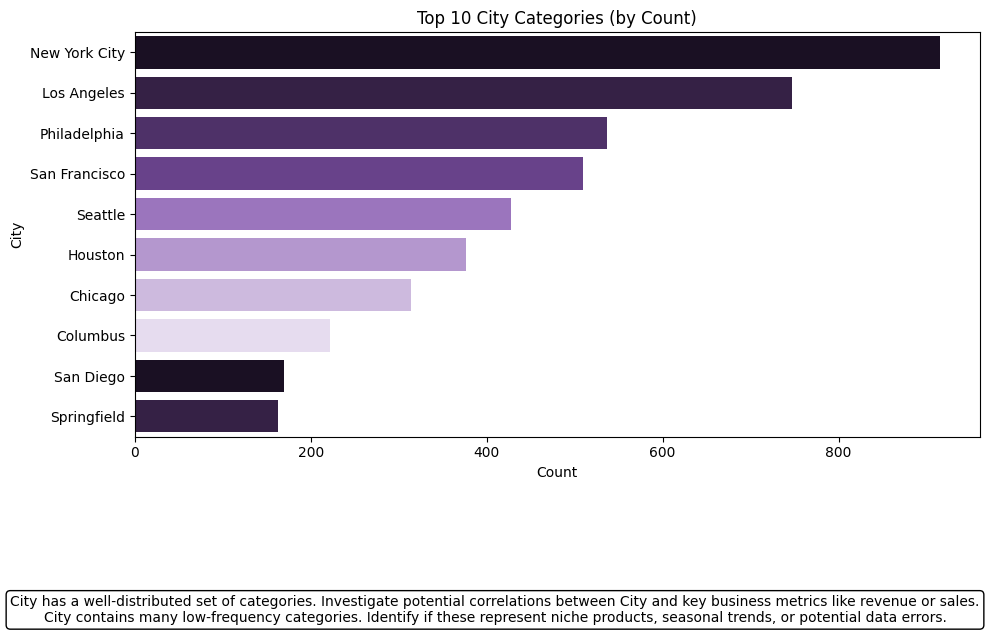

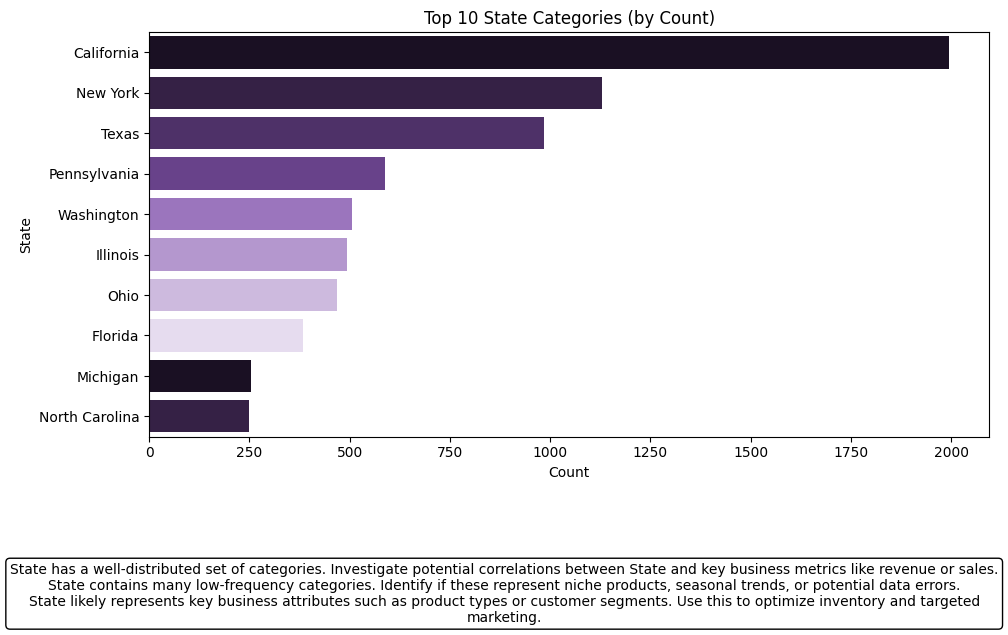

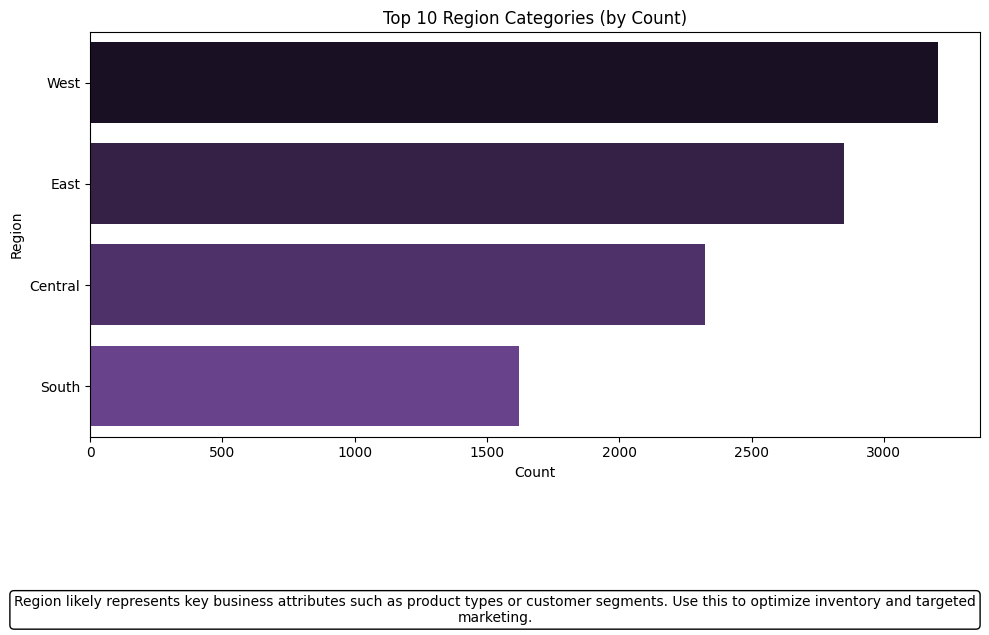

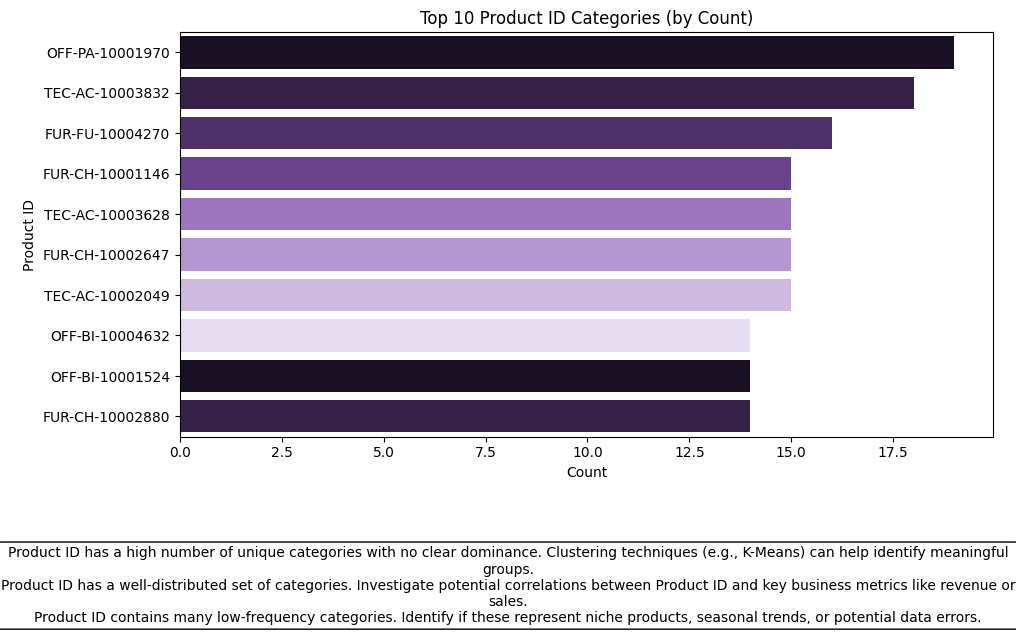

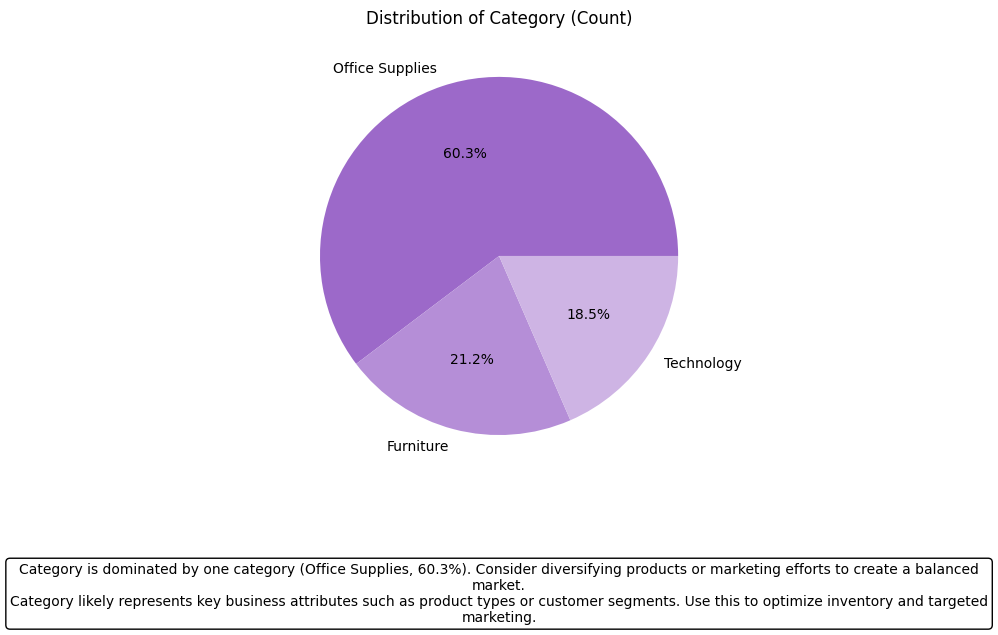

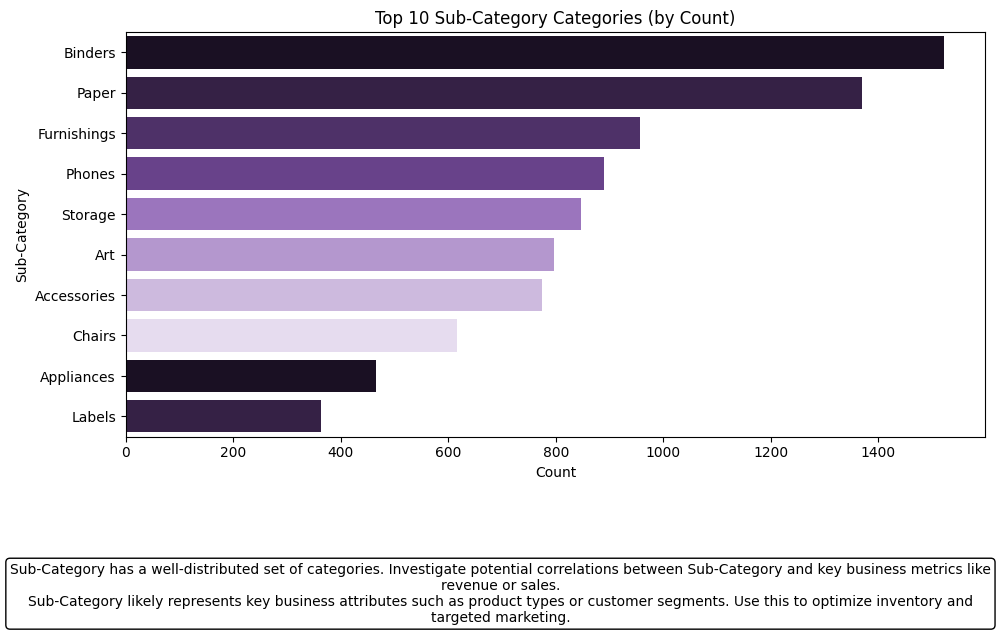

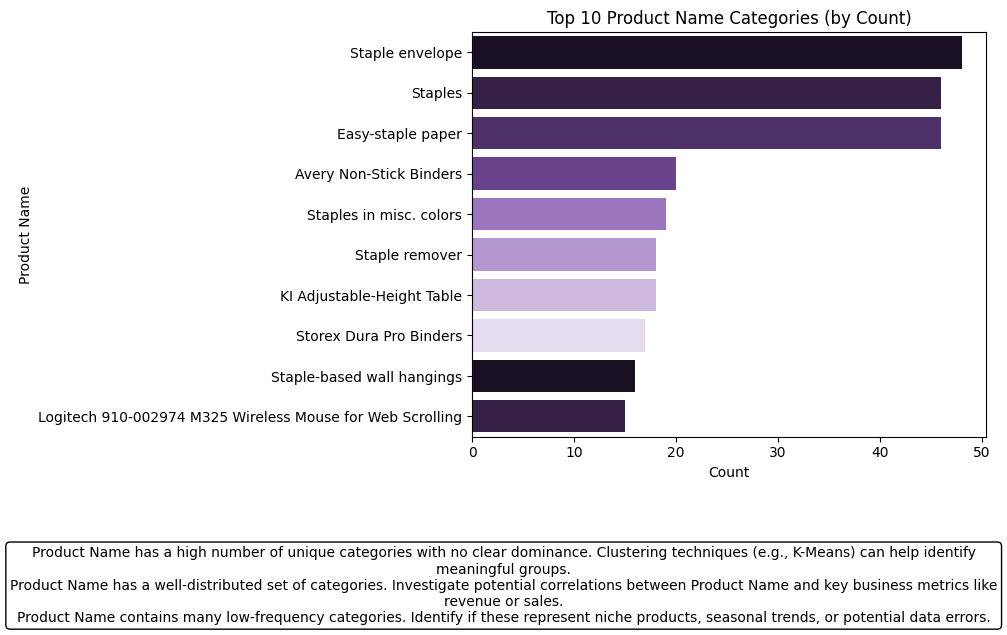

In [20]:
plot_top_categorical_counts_with_dynamic_insights(df_cleaned)


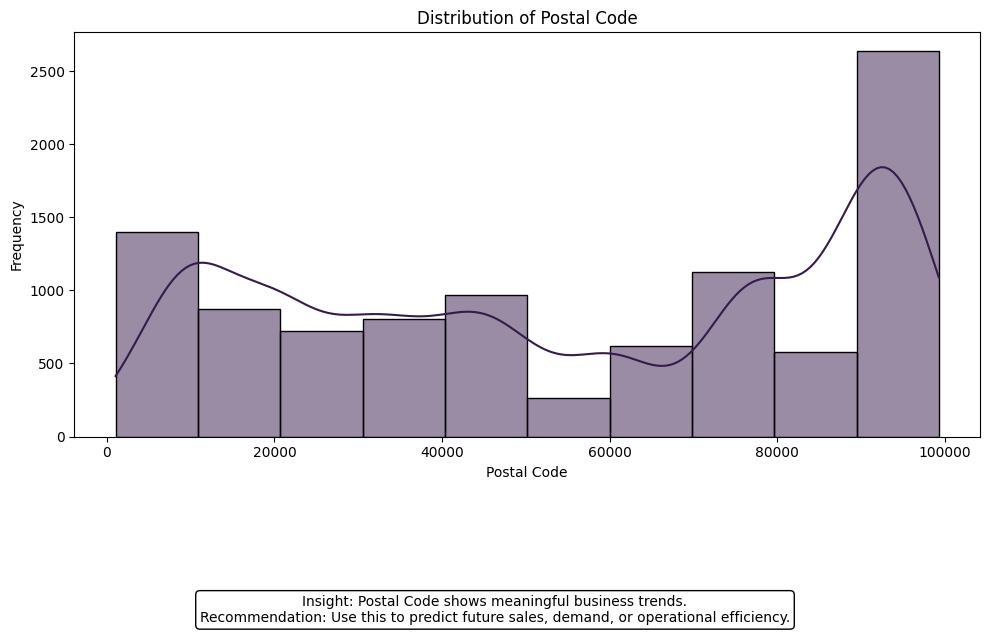

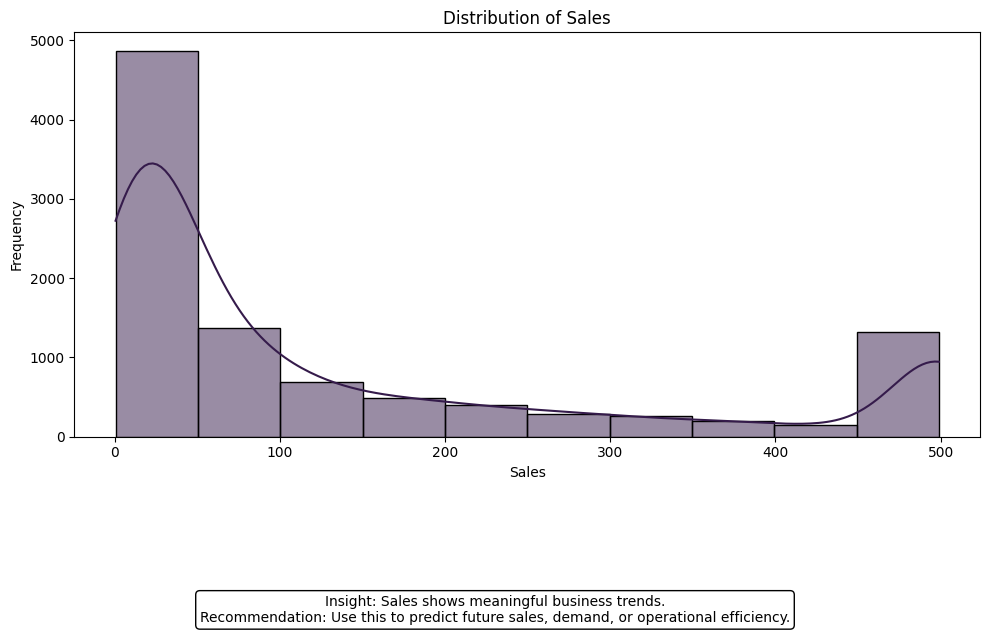

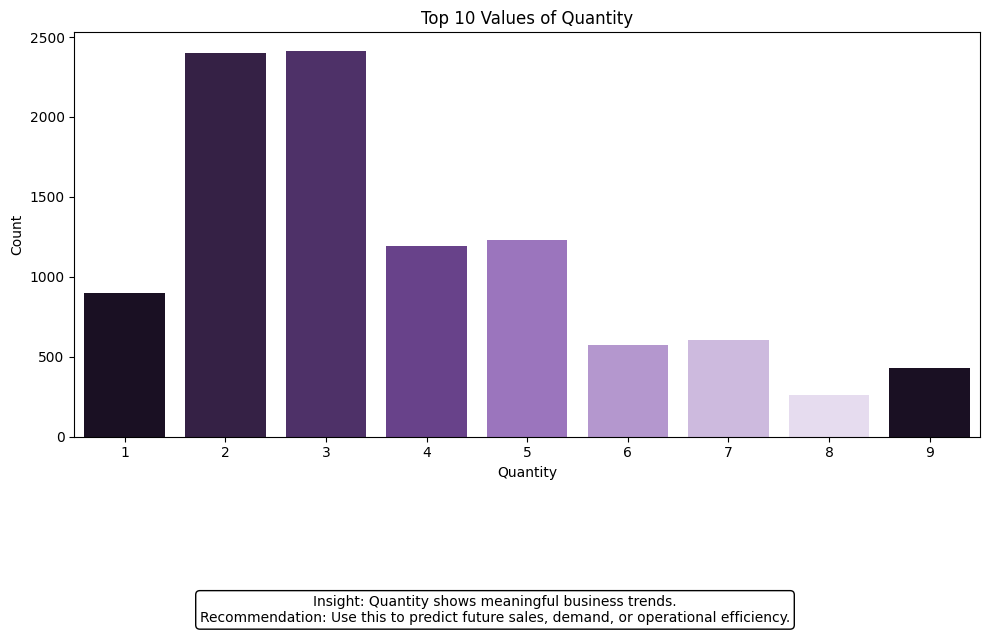

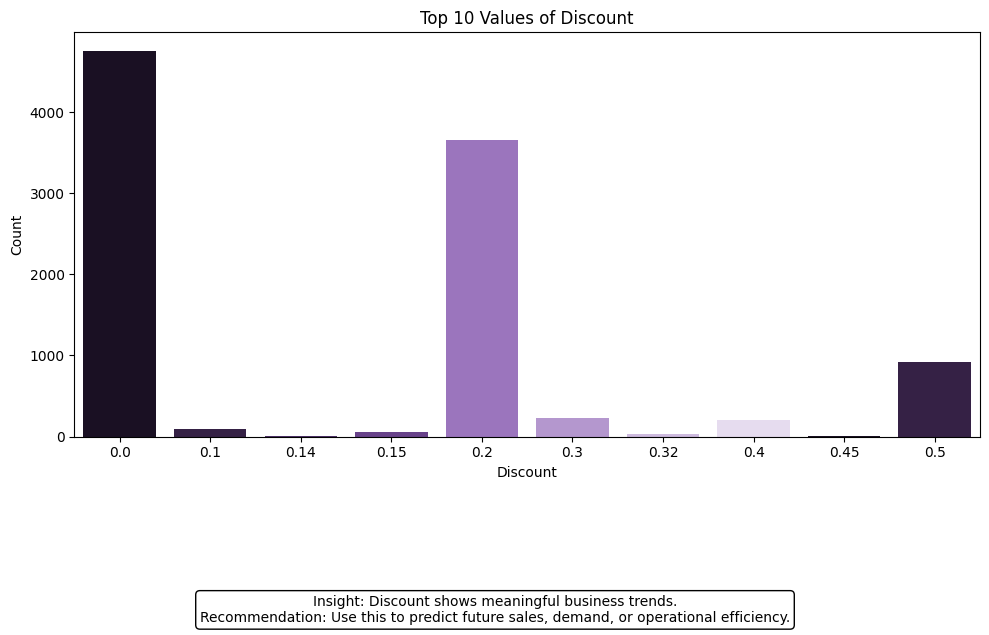

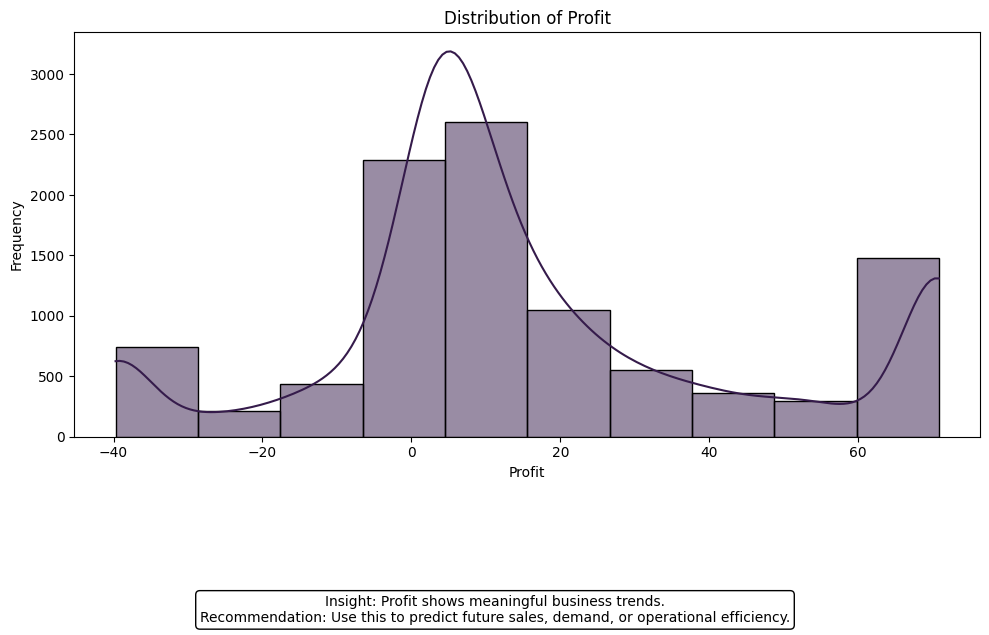

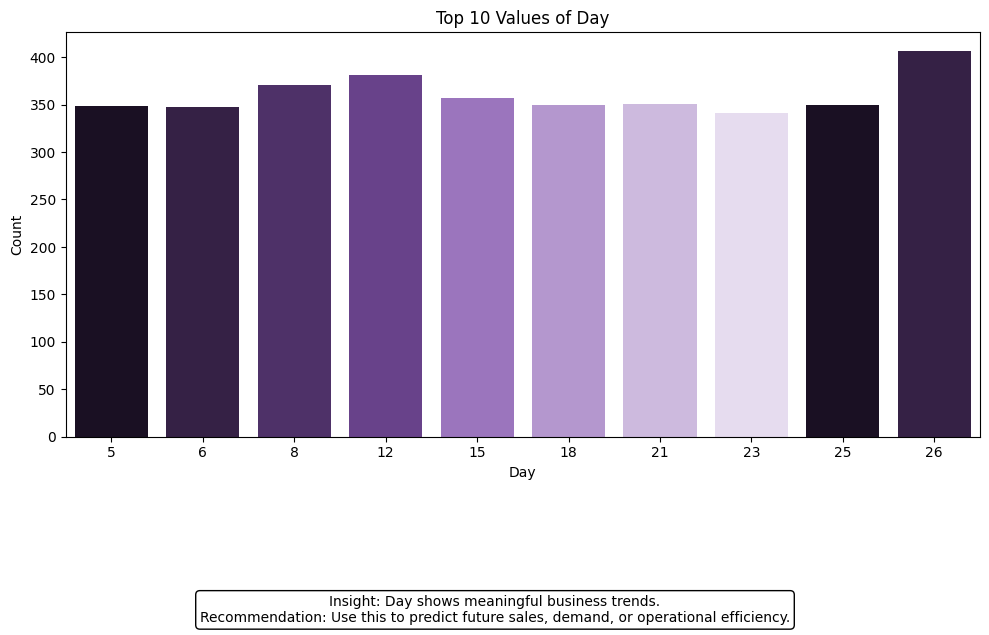

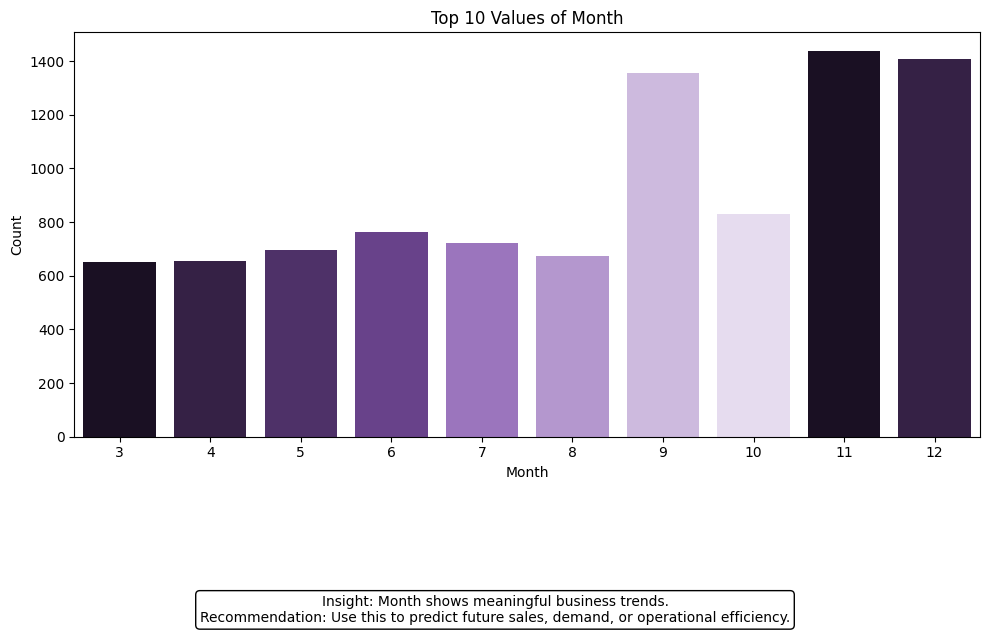

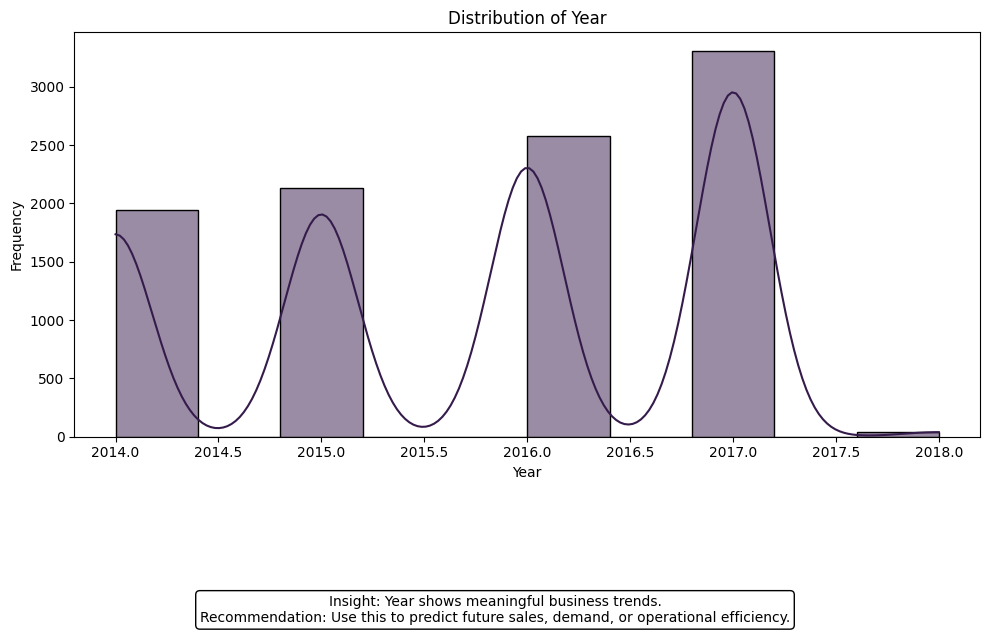

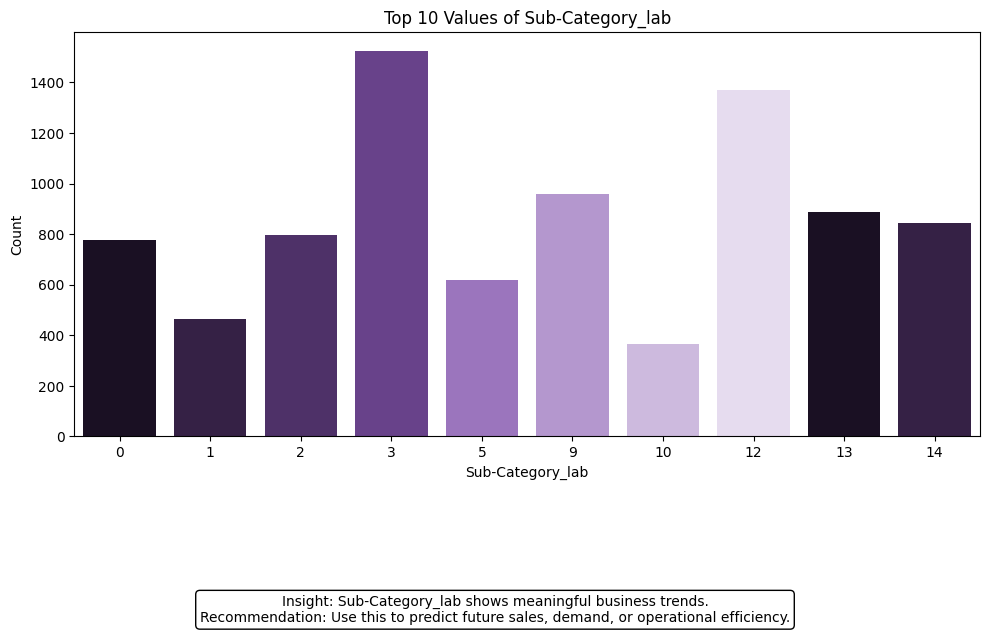

In [21]:
plot_top_numerical_insights(df_cleaned)


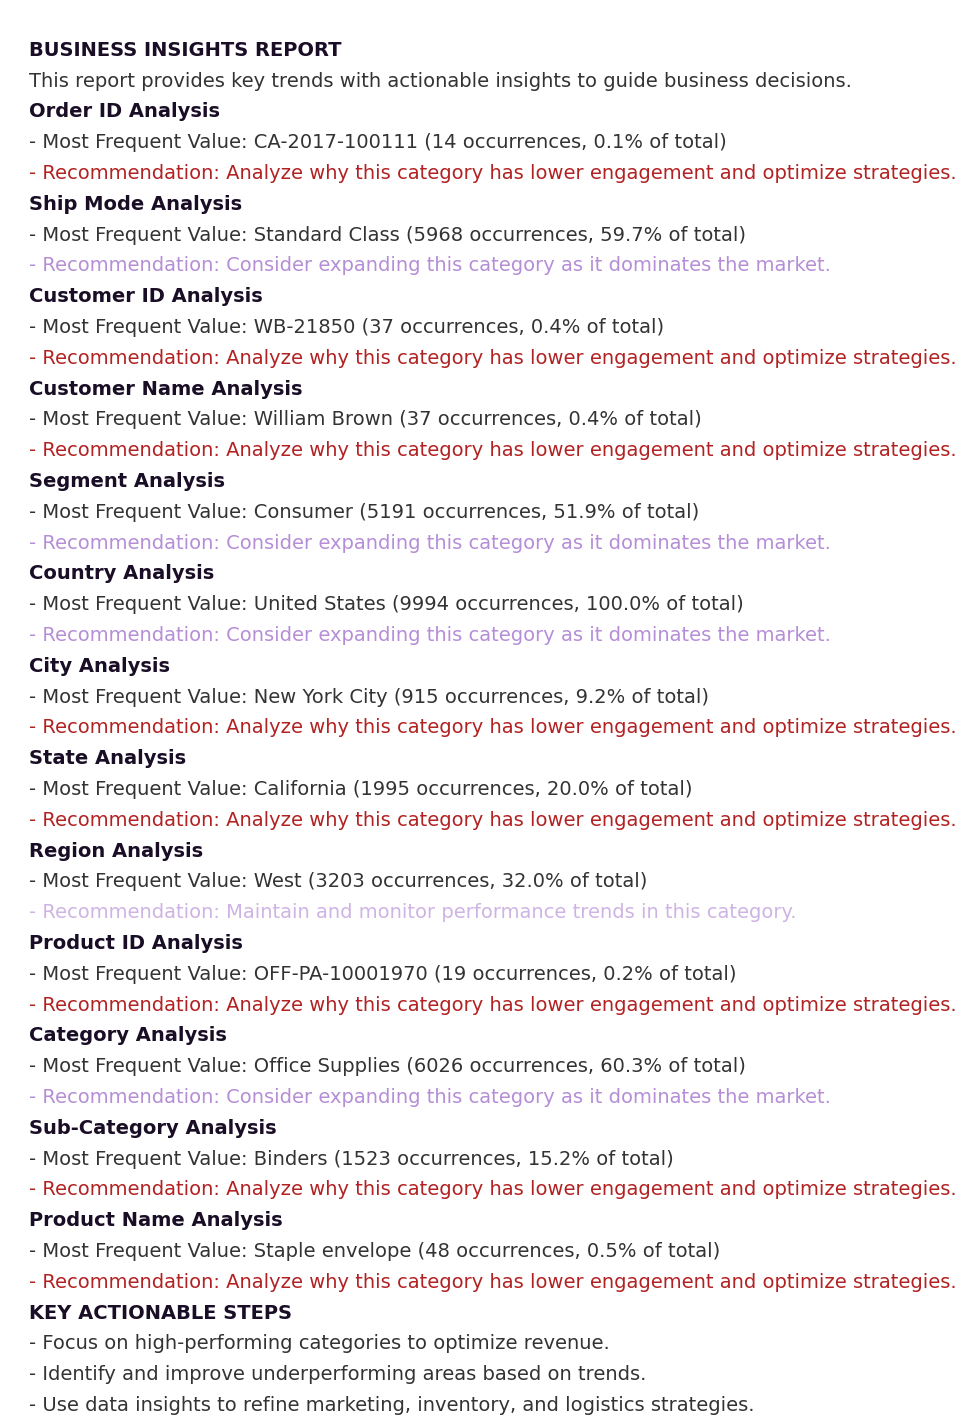

In [22]:
import matplotlib.pyplot as plt
from textwrap import wrap

def generate_summary_report_image(df):
    """
    Generates and displays a structured business insights report with enhanced readability,
    color-coded insights, and numerical breakdowns.

    Parameters:
        df (DataFrame): A Pandas DataFrame containing categorical data.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    insights = []

    # Title Section
    insights.append(("BUSINESS INSIGHTS REPORT\n", "#1A0D26", "bold"))
    insights.append(("This report provides key trends with actionable insights to guide business decisions.\n\n\n\n", "#333333", "regular"))

    # Generate insights for each categorical column
    for column in categorical_columns:
        value_counts = df[column].value_counts()
        top_value = value_counts.idxmax()  # Most frequent category
        count = value_counts.max()
        total = len(df)
        percentage = (count / total) * 100

        # Define color coding based on percentage
        if percentage > 50:
            color = "#B58ED7"  # Green for dominant categories
            action = "Recommendation: Consider expanding this category as it dominates the market."
        elif percentage > 20:
            color = "#CEB4E4"  # Orange for balanced categories
            action = "Recommendation: Maintain and monitor performance trends in this category."
        else:
            color = "#B22222"  # Red for underperforming categories
            action = "Recommendation: Analyze why this category has lower engagement and optimize strategies."

        # Generate formatted insight
        insights.append((f"{column} Analysis", "#1A0D26", "bold"))  # Bold column name
        insights.append((f"- Most Frequent Value: {top_value} ({count} occurrences, {percentage:.1f}% of total)", "#333333", "regular"))
        insights.append((f"- {action}\n", color, "regular"))

    # Key Actionable Steps
    insights.append(("KEY ACTIONABLE STEPS\n", "#1A0D26", "bold"))
    insights.append(("- Focus on high-performing categories to optimize revenue.", "#333333", "regular"))
    insights.append(("- Identify and improve underperforming areas based on trends.", "#333333", "regular"))
    insights.append(("- Use data insights to refine marketing, inventory, and logistics strategies.\n", "#333333", "regular"))

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Display text inside the figure with different colors and font weights
    y_position = 0.95
    for text, color, weight in insights:
        wrapped_text = "\n".join(wrap(text, width=90))
        ax.text(
            0.02, y_position, wrapped_text,
            fontsize=14,
            va="top", ha="left",
            family="Times New Roman",
            fontweight=weight,  # Use bold or regular
            linespacing=1.5,
            color=color
        )
        y_position -= 0.05  # Adjust spacing

    # Show the report image
    plt.show()

# Run the improved report
generate_summary_report_image(df_cleaned)


# **Exploratory data analysis**

In [23]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from textwrap import wrap

# # Function for automated EDA
# def automated_eda(df):
#     # 1. Separate numerical and categorical columns
#     numerical_cols = df.select_dtypes(include=[np.number]).columns
#     categorical_cols = df.select_dtypes(include=['object']).columns

#     # # 2. Distribution of Numerical Columns (Histograms)
#     # print("\n=== Distribution of Numerical Columns ===")
#     # num_rows = int(np.ceil(len(numerical_cols) / 2))  # Calculate rows for subplots
#     # num_cols = min(len(numerical_cols), 2)  # Maximum 2 columns
#     # plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows
#     # for i, col in enumerate(numerical_cols, 1):
#     #     plt.subplot(num_rows, num_cols, i)
#     #     sns.histplot(df[col], kde=True, color='blue')
#     #     plt.title(f'Distribution of {col}')
#     #     plt.xlabel(col)
#     #     plt.ylabel('Frequency')
#     #     plt.annotate(f"Mean: {df[col].mean():.2f}\nMedian: {df[col].median():.2f}",
#     #                  xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", alpha=0.1))
#     # plt.tight_layout()
#     # plt.show()

#     # 3. Pair Plot for Relationships Between Numerical Columns
#     if len(numerical_cols) > 1:
#         print("\n=== Relationships Between Numerical Columns ===")
#         pair_plot = sns.pairplot(df[numerical_cols], diag_kind='kde')
#         pair_plot.fig.suptitle('Pair Plot of Numerical Columns', y=1.02)
#         plt.annotate("Recommendation:\n- Use positive relationships for cross-selling.\n- Investigate negative relationships for potential issues.",
#                      xy=(0.5, -0.1), xycoords='axes fraction', fontsize=10, ha='center', bbox=dict(boxstyle="round", alpha=0.1))
#         plt.show()

#     # 4. Stacked Bar Plot for Highly Correlated Columns
#     if len(numerical_cols) > 1:
#         print("\n=== Highly Correlated Columns ===")
#         corr_matrix = df[numerical_cols].corr()
#         high_corr_pairs = []
#         for i in range(len(corr_matrix.columns)):
#             for j in range(i):
#                 if abs(corr_matrix.iloc[i, j]) > 0.7:  # Threshold for high correlation
#                     high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

#         for col1, col2 in high_corr_pairs:
#             plt.figure(figsize=(10, 6))
#             df_grouped = df.groupby(col1)[col2].mean().reset_index()
#             plt.bar(df_grouped[col1], df_grouped[col2], color='skyblue', label=col2)
#             plt.title(f'Relationship Between {col1} and {col2}')
#             plt.xlabel(col1)
#             plt.ylabel(col2)
#             plt.legend()
#             plt.annotate(f"Recommendation:\n- {col1} and {col2} are highly correlated.\n- Use this relationship for targeted marketing.",
#                          xy=(0.5, -0.2), xycoords='axes fraction', fontsize=10, ha='center', bbox=dict(boxstyle="round", alpha=0.1))
#             plt.show()

#     # 5. Line Chart for Trends Over Time (if applicable)
#     if 'Date' in df.columns or 'Month' in df.columns:
#         print("\n=== Trends Over Time ===")
#         time_col = 'Date' if 'Date' in df.columns else 'Month'
#         plt.figure(figsize=(10, 6))
#         sns.lineplot(x=df[time_col], y=df[numerical_cols[0]], marker='o')
#         plt.title(f'Trend of {numerical_cols[0]} Over Time')
#         plt.xlabel(time_col)
#         plt.ylabel(numerical_cols[0])
#         plt.xticks(rotation=45)
#         plt.annotate("Recommendation:\n- If the trend is increasing, scale up resources.\n- If decreasing, investigate potential issues.",
#                      xy=(0.5, -0.2), xycoords='axes fraction', fontsize=10, ha='center', bbox=dict(boxstyle="round", alpha=0.1))
#         plt.show()

#     # 6. Pie Chart for Categorical Columns
#     if len(categorical_cols) > 0:
#         print("\n=== Distribution of Categorical Columns ===")
#         for col in categorical_cols:
#             plt.figure(figsize=(8, 6))
#             df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis'))
#             plt.title(f'Distribution of {col}')
#             plt.ylabel('')
#             plt.annotate(f"Recommendation:\n- Focus on the most frequent category: {df[col].mode()[0]}.",
#                          xy=(0.5, -0.1), xycoords='axes fraction', fontsize=10, ha='center', bbox=dict(boxstyle="round", alpha=0.1))
#             plt.show()

#     # 7. Business Insights
#     print("\n=== Business Insights ===")
#     if len(numerical_cols) >= 2:
#         correlation = df[numerical_cols[0]].corr(df[numerical_cols[1]])
#         print(f"\nCorrelation between {numerical_cols[0]} and {numerical_cols[1]}: {correlation:.2f}")
#         if correlation > 0.7:
#             print("- Strong positive correlation: As one increases, the other tends to increase.")
#             print("Recommendation: Use this relationship for cross-selling or bundling products.")
#         elif correlation < -0.7:
#             print("- Strong negative correlation: As one increases, the other tends to decrease.")
#             print("Recommendation: Investigate potential conflicts or trade-offs.")
#         else:
#             print("- Weak or no correlation: The two variables are not strongly related.")
#             print("Recommendation: Focus on other relationships for deeper analysis.")

# # Perform Automated EDA
# automated_eda(df_cleaned)